<a href="https://colab.research.google.com/github/Yan-Weijia/ML/blob/master/ML-HW02/ML-HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

решить задачу бинарной классификации на большом корпусе imdb рецензий на фильмы. 
Корпус скачать http://ai.stanford.edu/~amaas/data/sentiment/

Ваша задача в sklearn, 

используя **три разных алгоритма**, 

**построить и обучить классификаторы**, 

для каждого из них **посчитать метрики качества**. 

Постройте **ROC кривую** и посчитайте **величину ROC AUC**. 

Выберите **лучший** классификатор.

Используя **предсказания вероятностей класса**, 

найдите **15** самых негативных и самых позитивных рецензий по мнению модели.  - 7 баллов

Написать **свои функции**, которые бы считали **tp, fp, tn, fn**, 

и возвращали **точность, полноту и ф-меру** 

и **применить их к результатам**, полученным вашими классификаторами 

(если все сделано правильно, то результаты должны **совпадать** с полученными  sklearn метриками). - 3 балла

## предобработка

In [0]:
!wget https://github.com/Yan-Weijia/ML/raw/master/ML_HW02/data/test.zip
!wget https://github.com/Yan-Weijia/ML/raw/master/ML_HW02/data/train.zip

In [0]:
import zipfile
fz = zipfile.ZipFile("test.zip", "r")
for f in fz.namelist():
  fz.extract(f)
fz.close()

fz = zipfile.ZipFile("train.zip", "r")
for f in fz.namelist():
  fz.extract(f)
fz.close()

In [16]:
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print(df_train)

       Unnamed: 0                                               Text Polarity
0               1  Bromwell High is a cartoon comedy. It ran at t...      pos
1               2  Homelessness (or Houselessness as George Carli...      pos
2               3  Brilliant over-acting by Lesley Ann Warren. Be...      pos
3               4  This is easily the most underrated film inn th...      pos
4               5  This is not the typical Mel Brooks film. It wa...      pos
...           ...                                                ...      ...
24995       24996  Towards the end of the movie, I felt it was to...      neg
24996       24997  This is the kind of movie that my enemies cont...      neg
24997       24998  I saw 'Descent' last night at the Stockholm Fi...      neg
24998       24999  Some films that you pick up for a pound turn o...      neg
24999       25000  This is one of the dumbest films, I've ever se...      neg

[25000 rows x 3 columns]


In [22]:
train_data = []
for t in df_train.Text.values:
  train_data.append(t)
print(train_data[0])

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [0]:
test_data = []
for t in df_test.Text.values:
  test_data.append(t)

In [0]:
import numpy as np

In [0]:
def mk_target(df):
  target_lst = []

  for p in df:
    if p == "pos":
      target_lst.append(1)
    if p == "neg":
      target_lst.append(0)

  target_array = np.array(target_lst)
  return target_array

In [0]:
train_target = mk_target(df_train.Polarity.values)
test_target = mk_target(df_test.Polarity.values)

In [51]:
train_target

array([1, 1, 1, ..., 0, 0, 0])

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(train_data) 
X_train_counts.shape

(25000, 74849)

In [53]:
X_test = count_vect.transform(test_data)
print(X_test.shape)

(25000, 74849)


## Метод ближайшего соседа

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_K = KNeighborsClassifier().fit(X_train_counts, train_target)

In [86]:
from sklearn.metrics import *

predicted_K = clf_K.predict(X_test) # 用train好的预测模型预测test
predicted_proba_K = clf_K.predict_proba(X_test)
predicted_proba_K[:5]

array([[0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8]])

Меры качества

In [87]:
acc_K = accuracy_score(y_true = test_target, y_pred = predicted_K)
print('acc_K={0:1.4f}'.format(acc_K))

f1_K = f1_score(y_true = test_target, y_pred = predicted_K, average = 'binary')
p_K = precision_score(y_true = test_target, y_pred = predicted_K, average = 'binary')
r_K = recall_score(y_true = test_target, y_pred = predicted_K, average = 'binary')
print('K F1={0:1.4f}, K P={1:1.4f}, K R={2:1.4f}'.format(f1_K, p_K, r_K))

acc_K=0.6242
K F1=0.6489, K P=0.6088, K R=0.6947


ROC

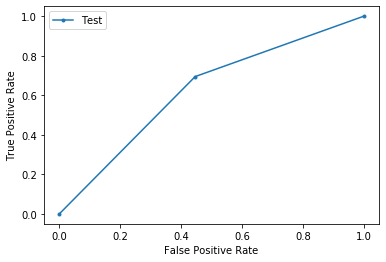

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

y_true = test_target
y_predicted = predicted_K
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ROC AUC

In [89]:
print(roc_auc_score(y_true, y_predicted))

0.62416


## Метод наивного Байеса

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf_MNB = MultinomialNB().fit(X_train_counts, train_target)
predicted_MNB = clf_MNB.predict(X_test)

Меры качества

In [91]:
acc_MNB = accuracy_score(y_true = test_target, y_pred = predicted_MNB)
print('acc_MNB={0:1.4f}'.format(acc_MNB))

f1_MNB = f1_score(y_true = test_target, y_pred = predicted_MNB, average = 'binary')
p_MNB = precision_score(y_true = test_target, y_pred = predicted_MNB, average = 'binary')
r_MNB = recall_score(y_true = test_target, y_pred = predicted_MNB, average = 'binary')
print('MNB F1={0:1.4f}, MNB P={1:1.4f}, MNB R={2:1.4f}'.format(f1_MNB, p_MNB, r_MNB))

acc_MNB=0.8136
MNB F1=0.8006, MNB P=0.8605, MNB R=0.7484


ROC

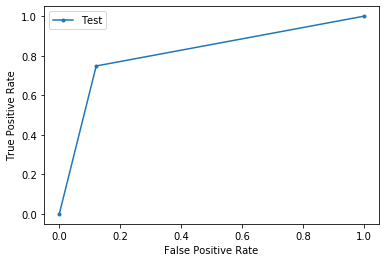

In [92]:
y_true = test_target
y_predicted = predicted_MNB
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ROC AUC

In [93]:
print(roc_auc_score(y_true, y_predicted))

0.81356


## Логистическая регрессия

In [0]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression().fit(X_train_counts, train_target)
predicted_LR = clf_LR.predict(X_test)

Меры качества

In [95]:
acc_LR = accuracy_score(y_true = test_target, y_pred = predicted_LR)
print('acc_LR={0:1.4f}'.format(acc_LR))

f1_LR = f1_score(y_true = test_target, y_pred = predicted_LR, average = 'binary')
p_LR = precision_score(y_true = test_target, y_pred = predicted_LR, average = 'binary')
r_LR = recall_score(y_true = test_target, y_pred = predicted_LR, average = 'binary')
print('LR F1={0:1.4f}, LR P={1:1.4f}, LR R={2:1.4f}'.format(f1_LR, p_LR, r_LR))

acc_LR=0.8646
LR F1=0.8635, LR P=0.8707, LR R=0.8563


ROC

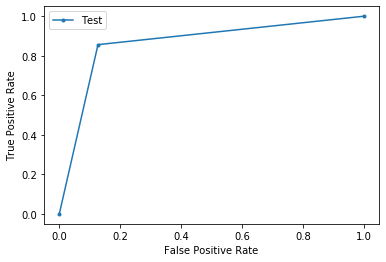

In [96]:
y_true = test_target
y_predicted = predicted_LR
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ROC AUC

In [97]:
print(roc_auc_score(y_true, y_predicted))

0.8646


**лучший классификатор: логистическая регрессия**

## 15 самых негативных и самых позитивных рецензий по мнению LR

In [0]:
predicted_proba_LR = clf_LR.predict_proba(X_test)
lst_proba = predicted_proba_LR.tolist()

lst_pos = [p[1] for p in lst_proba]

dic_pos = {}
for i, n in enumerate(lst_pos):
  dic_pos[i] = n

dic_pos = sorted(dic_pos.items(), key=lambda e:e[1], reverse=True)

15 топ позитивных

In [122]:
pos_index = [i[0] for i in dic_pos[:15]]
pos_index

[214,
 1743,
 2421,
 3521,
 4452,
 7879,
 8824,
 9007,
 9528,
 5632,
 8149,
 7341,
 879,
 10852,
 2690]

15 топ негативных

In [120]:
neg_index = [i[0] for i in dic_pos[-15:]]
neg_index

[19163,
 19851,
 16149,
 16868,
 13721,
 19157,
 19422,
 18734,
 24494,
 14267,
 23531,
 16007,
 17909,
 17752,
 18921]

## свои функции

In [0]:
def quality(predicted, test_target):
  pre = predicted.tolist()
  tar = test_target.tolist()

  tn = 0
  fn = 0
  fp = 0
  tp = 0

  for i, p in enumerate(pre):
    if p == 0 and tar[i] == 0:
      tn += 1
    if p == 0 and tar[i] == 1:
      fn += 1
    if p == 1 and tar[i] == 0:
      fp += 1
    if p == 1 and tar[i] == 1:
      tp += 1
  
  Pr = tp / (tp + fp)
  R = tp / (tp + fn)
  F1 = (2 * Pr * R) / (Pr + R)
  
  results = 'Pr={0:1.4f}, R={1:1.4f}, F1={2:1.4f}'.format(Pr, R, F1)

  return results

оценки метода ближайщего соседа

In [134]:
print(quality(predicted_K, test_target))

Pr=0.6088, R=0.6947, F1=0.6489


оценки метода наивного Байеса

In [131]:
print(quality(predicted_MNB, test_target))

Pr=0.8605, R=0.7484, F1=0.8006


оценки логистической регрессии

In [132]:
print(quality(predicted_LR, test_target))

Pr=0.8707, R=0.8563, F1=0.8635


**результаты совпадают с полученными sklearn метриками**